# The curse of dimensionality


## Train - test split
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/6Ke8D3'}}"
prefix='data_from_datacamp/Chap211_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df.csv": "https://file.io/6Ke8D3"}}
{'pandas.core.frame.DataFrame': {'ansur_df.csv': 'https://file.io/6Ke8D3'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 15360    0 15360    0     0   6947      0 --:--:--  0:00:02 --:--:--  6950
100  372k    0  372k    0     0   158k      0 --:--:--  0:00:02 --:--:--  159k


In [2]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

### code

- Import the train_test_split function from sklearn.model_selection.
- Assign the 'Gender' column to y.
- Remove the 'Gender' column from the dataframe and assign the result to X.
- Set the test size to 30% to perform a 70% train and 30% test data split.

In [3]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


## Fitting and testing the model
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

### init: 2 dataframes, 2 series

In [4]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(X_train, X_test, y_train,  y_test)
tobedownloaded="{pandas.core.frame.DataFrame: {'X_test.csv': 'https://file.io/zMPkDH',  'X_train.csv': 'https://file.io/iD4GwV'}, pandas.core.series.Series: {'y_test.csv': 'https://file.io/l7A9yR',  'y_train.csv': 'https://file.io/hv3h75'}}"
prefix='data_from_datacamp/Chap212_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"X_test.csv": "https://file.io/zMPkDH",  "X_train.csv": "https://file.io/iD4GwV"}, pandas.core.series.Series: {"y_test.csv": "https://file.io/l7A9yR",  "y_train.csv": "https://file.io/hv3h75"}}
{'pandas.core.frame.DataFrame': {'X_test.csv': 'https://file.io/zMPkDH', 'X_train.csv': 'https://file.io/iD4GwV'}, 'pandas.core.series.Series': {'y_test.csv': 'https://file.io/l7A9yR', 'y_train.csv': 'https://file.io/hv3h75'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  111k    0  111k    0     0  92541      0 --:--:--  0:00:01 --:--:-- 92616
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  

In [5]:
import pandas as pd
X_train=pd.read_csv(prefix+'X_train.csv',index_col=0)
X_test=pd.read_csv(prefix+'X_test.csv',index_col=0)
y_train=pd.read_csv(prefix+'y_train.csv',index_col=0, header=None,squeeze=True)
y_test=pd.read_csv(prefix+'y_test.csv',index_col=0, header=None,squeeze=True)

### code

In [6]:
# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC(gamma='auto')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

49.7% accuracy on test set vs. 100.0% on training set


## Accuracy after dimensionality reduction
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test vs. training data.

All relevant packages and y have been pre-loaded.

### init: 1 dataframe, 1 serie

In [8]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df,y)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/n0HzG8'}, pandas.core.series.Series: {'y.csv': 'https://file.io/7GzVgh'}}"
prefix='data_from_datacamp/Chap213_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df.csv": "https://file.io/n0HzG8"}, pandas.core.series.Series: {"y.csv": "https://file.io/7GzVgh"}}
{'pandas.core.frame.DataFrame': {'ansur_df.csv': 'https://file.io/n0HzG8'}, 'pandas.core.series.Series': {'y.csv': 'https://file.io/7GzVgh'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  372k    0  372k    0     0   283k      0 --:--:--  0:00:01 --:--:--  283k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  98

In [9]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)
y=pd.read_csv(prefix+'y.csv',index_col=0, header=None,squeeze=True)


### code

In [10]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

95.0% accuracy on test set vs. 93.4% on training set


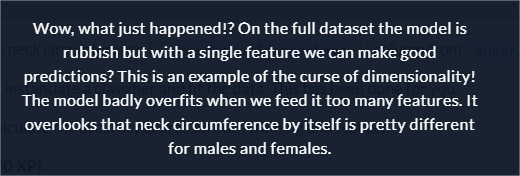

# Features with missing values or little variance


## Finding a good variance threshold
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

### init:  1 dataframe, plt

In [11]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(head_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'head_df.csv': 'https://file.io/HAjSub'}}"
prefix='data_from_datacamp/Chap221_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"head_df.csv": "https://file.io/HAjSub"}}
{'pandas.core.frame.DataFrame': {'head_df.csv': 'https://file.io/HAjSub'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  255k    0  255k    0     0   153k      0 --:--:--  0:00:01 --:--:--  153k


In [12]:
import pandas as pd
head_df=pd.read_csv(prefix+'head_df.csv',index_col=0)

In [14]:
import matplotlib.pyplot as plt

### code

Create a boxplot on head_df.


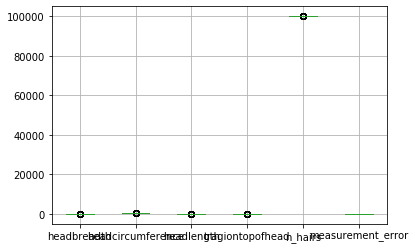

In [15]:
# Create the boxplot
head_df.boxplot()

plt.show()

Normalize the data by dividing the dataframe with its mean values.


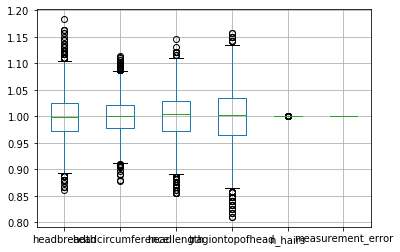

In [17]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

Print the variances of the normalized data.


In [18]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64


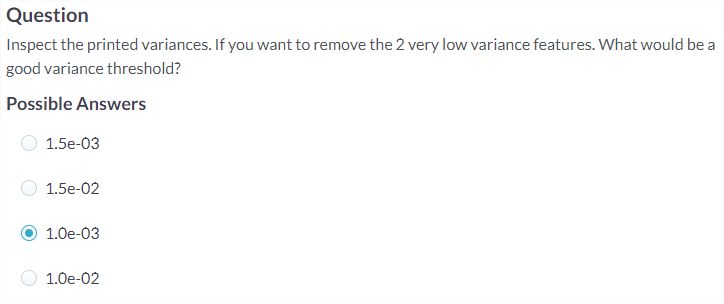

## Features with low variance
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

### code

In [19]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


In [20]:
#export
#Create a boolean mask from the selector using .get_support().
#Create a reduced dataframe by passing the mask to the .loc[] method.

## Removing features with many missing values
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

### init: 1 dataframe

In [21]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(school_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'school_df.csv': 'https://file.io/EBVGeJ'}}"
prefix='data_from_datacamp/Chap223_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"school_df.csv": "https://file.io/EBVGeJ"}}
{'pandas.core.frame.DataFrame': {'school_df.csv': 'https://file.io/EBVGeJ'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 24759    0 24759    0     0  24202      0 --:--:--  0:00:01 --:--:-- 24226


In [22]:
import pandas as pd
school_df=pd.read_csv(prefix+'school_df.csv',index_col=0)

### code

Question
- In what range lies highest ratio of missing values for a single feature in the dataset?

In [24]:
school_df.isna().sum()/len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

- Create a boolean mask on whether each feature has less than 50% missing values.
- Apply the mask to school_df to select columns without many missing values.

In [25]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


# Pairwise correlation

## Inspecting the correlation matrix
A sample of the ANSUR body measurements dataset has been pre-loaded as ansur_df. Use the terminal to create a correlation matrix for this dataset.

What is the correlation coefficient between wrist and ankle circumference?

### init: 1 dataframe

In [26]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/9g9uY2'}}"
prefix='data_from_datacamp/Chap231_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df.csv": "https://file.io/9g9uY2"}}
{'pandas.core.frame.DataFrame': {'ansur_df.csv': 'https://file.io/9g9uY2'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  147k    0  147k    0     0   131k      0 --:--:--  0:00:01 --:--:--  131k


In [27]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

### code

In [28]:
ansur_df.corr()

,Elbow rest height,Wrist circumference,Ankle circumference,Buttock height,Crotch height
Elbow rest height,1.000000,0.294753,0.301963,-0.007013,-0.026090
Wrist circumference,0.294753,1.000000,0.702178,0.576679,0.606582
Ankle circumference,0.301963,0.702178,1.000000,0.367548,0.386502
Buttock height,-0.007013,0.576679,0.367548,1.000000,0.929411
Crotch height,-0.026090,0.606582,0.386502,0.929411,1.000000


## Visualizing the correlation matrix
Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt, NumPy as np and pandas as pd.

### init: sns, plt, np, pd

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

In [33]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)


### code

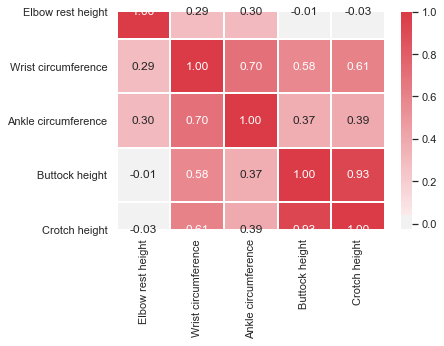

In [37]:
# Create the correlation matrix
corr = ansur_df.corr()

# Draw the heatmap
sns.heatmap(corr,  cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Create a boolean mask for the upper triangle of the plot.


In [38]:
# Create the correlation matrix
corr = ansur_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

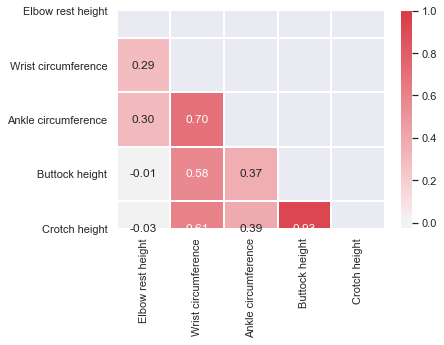

In [39]:
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Removing highly correlated features


## Filtering out highly correlated features
You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

### init: 1 dataframe

In [40]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df.csv': 'https://file.io/YbS0hM'}}"
prefix='data_from_datacamp/Chap241_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df.csv": "https://file.io/YbS0hM"}}
{'pandas.core.frame.DataFrame': {'ansur_df.csv': 'https://file.io/YbS0hM'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 1305k    0 1305k    0     0   494k      0 --:--:--  0:00:02 --:--:--  494k
100 1850k    0 1850k    0     0   664k      0 --:--:--  0:00:02 --:--:--  664k


In [41]:
import pandas as pd
ansur_df=pd.read_csv(prefix+'ansur_df.csv',index_col=0)

### code

- Calculate the correlation matrix of ansur_df and take the absolute value of this matrix.
- Create a boolean mask with True values in the upper right triangle and apply it to the correlation matrix.
- Set the correlation coefficient threshold to 0.95.
- Drop all the columns listed in to_drop from the dataframe.

In [42]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The reduced dataframe has 88 columns.


## Nuclear energy and pool drownings
The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

Seaborn has been pre-loaded as sns and matplotlib.pyplot as plt.

### init: 1 dataframe, sns, plt

In [43]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(weird_df)
tobedownloaded="{pandas.core.frame.DataFrame: {'weird_df.csv': 'https://file.io/nhkUfH'}}"
prefix='data_from_datacamp/Chap242_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"weird_df.csv": "https://file.io/nhkUfH"}}
{'pandas.core.frame.DataFrame': {'weird_df.csv': 'https://file.io/nhkUfH'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   164    0   164    0     0    307      0 --:--:-- --:--:-- --:--:--   307
100   164    0   164    0     0    307      0 --:--:-- --:--:-- --:--:--   307


In [44]:
import pandas as pd
weird_df=pd.read_csv(prefix+'weird_df.csv',index_col=0)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### code

In [46]:
# Print the first five lines of weird_df
print(weird_df.head(5))

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


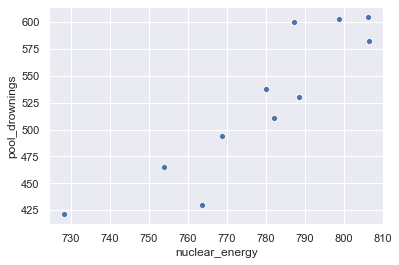

In [48]:
# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [49]:
# Print out the correlation matrix of weird_df
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000
